# MA3K7 Assignment 1 #

Determining the number of distinct number bracelets:

In [145]:
#create function to make a number bracelet
def chain(a,b):
    my_list = []
    for i in range(100):
        if (a,b) in my_list:
            break
        else:
            my_list += [(a,b)]
            num = (a + b) % 10
            a, b = b, num
            
    return set(my_list)

In [146]:
#iterate over all possible starting pairs and see how many are distinct
chains = []
counter = 0
for i in range(10):
    for j in range(10):
        if chain(i,j) in chains:
            pass
        else:
            chains += [chain(i,j)]
            counter += 1
print(f"The number of distinct bracelets is {counter}")            

The number of distinct bracelets is 6


## Extension ##

Now we want to see how we can generalise the problem and the solutions it gives.

In [148]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [97]:
#repeat the problem, but using integers from -50 to 10
chain_lengths = []

for n in range(10,60):
    def chain(a,b):
        my_list = []
        for i in range(n**2):
            if (a,b) in my_list:
                break
            else:
                my_list += [(a,b)]
                num = (a + b) % 10
                a, b = b, num
            
        return set(my_list)

    chains = []
    counter = 0
    for i in range(-1*n + 10, 10):
        for j in range(-1*n + 10, 10):
            if chain(i,j) in chains:
                pass
            else:
                chains += [chain(i,j)]
                counter += 1
    chain_lengths += [counter]            

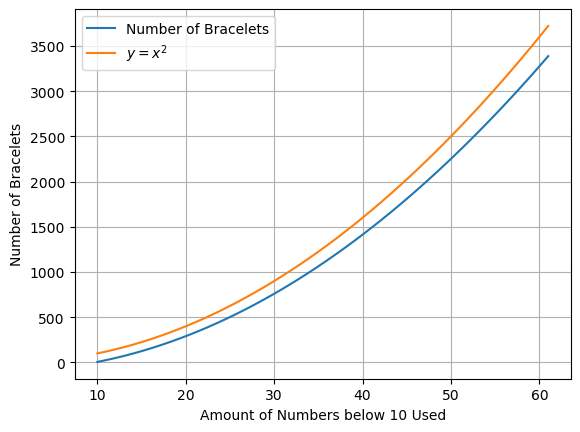

In [102]:
#plt the results
plt.plot(np.linspace(10,61,50),chain_lengths, label = 'Number of Bracelets')
plt.plot(np.linspace(10,61,50),np.linspace(10,61,50)**2, label = '$y = x^{2}$')
plt.legend()
plt.xlabel('Amount of Numbers below 10 Used')
plt.ylabel('Number of Bracelets')
plt.grid()
plt.show()

In [124]:
#repeat the problem with a different rule; addition modulo m for m between 10 and 60
chain_len_mod = []
for m in range(10,60):
    counter = 0
    def chain(a,b):
        my_list = []
        for i in range(m**2):
            if (a,b) in my_list:
                break
            else:
                my_list += [(a,b)]
                num = (a + b) % m
                a, b = b, num
            
        return set(my_list)

    chains = []
    counter = 0
    for i in range(m):
        for j in range(m):
            if chain(i,j) in chains:
                pass
            else:
                chains += [chain(i,j)]
                counter += 1
    chain_len_mod += [counter]

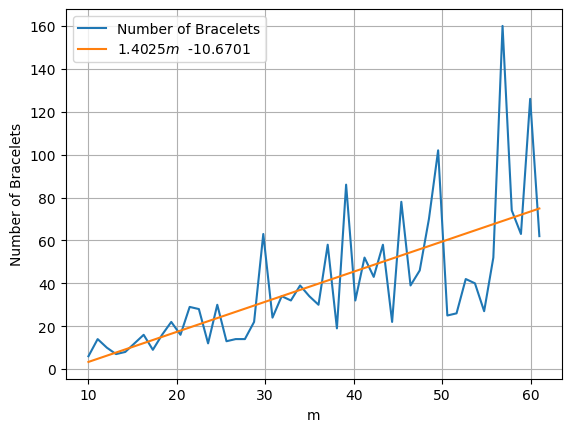

In [158]:
##plot results##

#calculate linear regression
slope, intercept, r, p, std_err = stats.linregress(np.linspace(10,61,50), chain_len_mod)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, np.linspace(10,61,50)))

plt.plot(np.linspace(10,61,50),chain_len_mod, label = 'Number of Bracelets')
plt.plot(np.linspace(10,61,50), mymodel, label = f"{round(slope,4)}$m$  {round(intercept,4)}")
plt.xlabel('m')
plt.ylabel('Number of Bracelets')
plt.legend()
plt.grid()
plt.show()